<a href="https://colab.research.google.com/github/conormooney98/Applied-Predictive-Analytics/blob/main/Naive_Bayes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## Importing the dataset

In [ ]:
dataset = pd.read_csv("NBAdata5new.csv")


dataset['TEAM'] = dataset['TEAM'].astype('category')
dataset['enc_Team'] = dataset['TEAM'].cat.codes
data1 = dataset
X=dataset.drop(labels=['WL','TEAM','Date', '+/-', 'FTM', '3PA', 'PF', 'FTM', '3PM', 'OREB'], axis=1).values
y = dataset["WL"].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

[[  1.  44.  85. ...  13. 122.  39.]
 [  0.  39.  95. ...  17. 110.  25.]
 [  1.  37. 100. ...  12. 104.  28.]
 ...
 [  1.  40.  93. ...   9.  99.  27.]
 [  1.  44.  86. ...  21. 102.  11.]
 [  0.  36.  88. ...  18.  93.  11.]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

auc = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
yhat = y_pred
print("Accuracy :", round(auc,2) )
print("Precision :", round(precision,2))
print("Recall :", round(recall,2))
print("F1 :", round(f1,2))

[[35  7]
 [ 9 49]]
Accuracy : 0.84
Precision : 0.88
Recall : 0.84
F1 : 0.86


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[49  9]
 [ 7 35]]


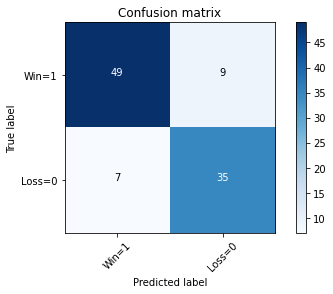

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Win=1','Loss=0'],  title='Confusion matrix')